# Linear Regression to impute missing values

In [ ]:
## Importing all the necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
## Reading the csv file
bills_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_data/AtomState/bills.csv')

In [ ]:
## checking the data
bills_data_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
## checking the desciption of data
bills_data_df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [ ]:
## checking the information about data to find null values and found that  there are missing values(37) in margin_low
bills_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [ ]:
##copied the dataframe
imputed_df = bills_data_df.copy()

In [ ]:
## seperating data for training the model
for column in imputed_df.columns:
    missing_indices = imputed_df[column].isnull()
    print(column)

    if missing_indices.any():
      X_complete = imputed_df.loc[~missing_indices, imputed_df.columns != column]
      y_complete = imputed_df.loc[~missing_indices, column]
      X_incomplete = imputed_df.loc[missing_indices, imputed_df.columns != column]

is_genuine
diagonal
height_left
height_right
margin_low
margin_up
length


In [ ]:
print(X_complete.shape)
print(y_complete.shape)
print(X_incomplete.shape)

(1463, 6)
(1463,)
(37, 6)


In [ ]:
## Building the model
model = LinearRegression()
model.fit(X_complete, y_complete)

LinearRegression()

In [ ]:
## Predicting the missing values
y_predicted = model.predict(X_incomplete)

In [ ]:
print(y_predicted)

[4.06495361 4.11199026 4.13400328 3.99357074 4.1403993  4.09428392
 4.07412432 4.12538999 4.0807278  4.07363322 4.11897255 4.18037978
 4.13648423 4.05106842 4.17837685 4.22555104 4.11586845 4.10284101
 4.08184346 4.09276238 4.11250192 4.15717623 4.16028787 4.12193808
 4.12353555 4.19842271 4.10962313 4.09696025 4.13384101 5.25968515
 5.264817   5.28251853 5.30206887 5.20035843 5.1754678  5.17345045
 5.24675055]


In [ ]:
imputed_df.loc[imputed_df.margin_low.isnull(),"margin_low"] = y_predicted

In [ ]:
## Round-off the predicted values to two decimals and Append the predicted values with the dataframe
imputed_df.loc[imputed_df['margin_low'].isna(), 'margin_low'] = y_predicted.round(2)

In [ ]:
## Checking the final data information and all the columns have the values
print(imputed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


In [ ]:
## Save the final data as csv file.
imputed_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Assignment_data/AtomState/imputed_bills.csv")

# Comparing bill authenticity with logistic regression vs unsupervised learning(K-means)

In [ ]:
## Importing all the necessary libraries
from sklearn.model_selection import train_test_split,cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## loading the updated complete dataset
full_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_data/AtomState/imputed_bills.csv')

In [ ]:
## cheking the content in the our file
full_dataset.head()

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
## Checking the description of data in file
full_dataset.describe()

,Unnamed: 0,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,749.500000,171.958440,104.029533,103.920307,4.482827,3.151473,112.67850
std,433.157015,0.305195,0.299462,0.325627,0.659905,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,374.750000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,749.500000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1124.250000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1499.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [ ]:
## Drop unnecessary column
full_dataset = full_dataset.drop(columns=['Unnamed: 0'])

In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


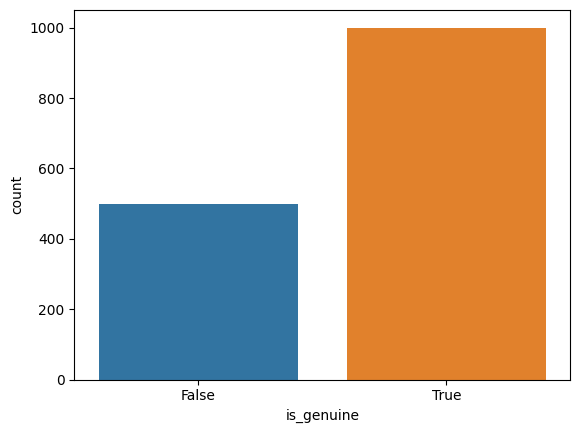

In [ ]:
## checking the data distribution
sns.countplot(data=full_dataset, x='is_genuine');

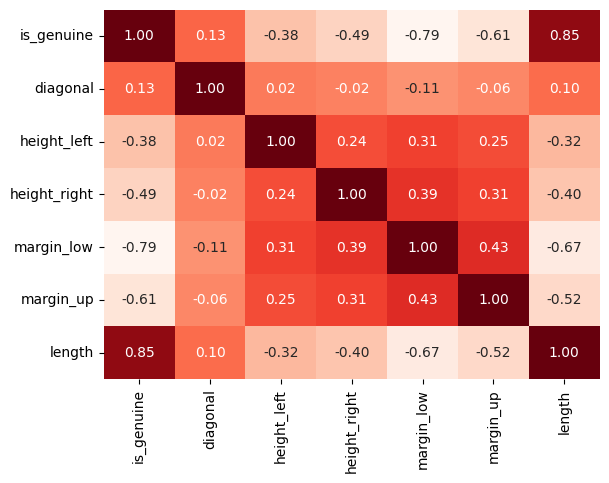

In [ ]:
## finding correlation between variables
corr = full_dataset.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds');

In [ ]:
## divide data into features and target values
features = full_dataset.drop('is_genuine',axis=1)
target = full_dataset['is_genuine']

In [ ]:
## split data into 80% training data and 20% as test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
## checking the shape of data
print(X_train.shape)
print(X_test.shape)

(1200, 6)
(300, 6)


In [ ]:
## Building logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
## predicting the target values
y_pred = log_reg_model.predict(X_test)

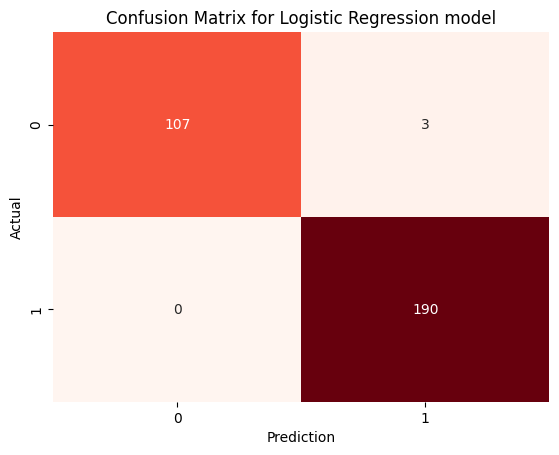

In [ ]:
## Visualize confusion
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Reds', cbar=None, fmt='.0f')
plt.title('Confusion Matrix for Logistic Regression model')
plt.ylabel('Actual')
plt.xlabel('Prediction');

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
## Checking the accuracy of the model
print("Accuracy of Logistic Regression model is :", accuracy)

Accuracy of Logistic Regression model is : 0.99


In [ ]:
## checking classification report of the model
print("Classification Report for train/test (80/20) split logistic regression:\n", classification_rep)

Classification Report for train/test (80/20) split logistic regression:
               precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
## performing cross validation on the logistic model
cross_validation_model = LogisticRegression()

y_pred = cross_val_predict(cross_validation_model, features, target, cv=10, n_jobs=-1)

acc_crval = accuracy_score(target, y_pred)

print(f'The accuracy score for Logistic Regression by cross validation is: {acc_crval:.3f}')

The accuracy score for Logistic Regression by cross validation is: 0.990


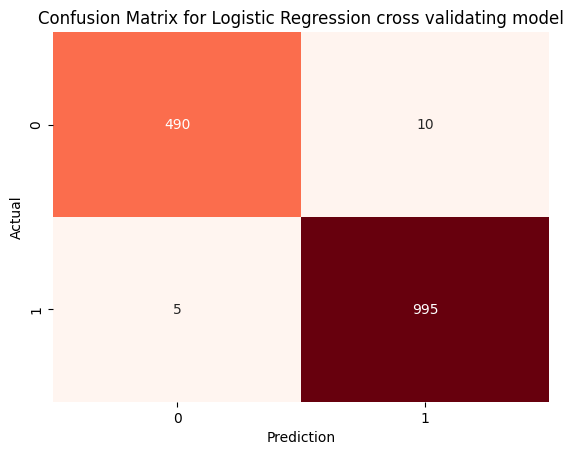

In [ ]:
## confusion matrix for cross validating model
conf_mat = confusion_matrix(target, y_pred)
sns.heatmap(conf_mat, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.title('Confusion Matrix for Logistic Regression cross validating model')
plt.ylabel('Actual')
plt.xlabel('Prediction');

In [ ]:
## classification report by cross validating the model
report = classification_report(target, y_pred)
print("Classification Report for cross validation logistic regression:\n",report)

Classification Report for cross validation logistic regression:
               precision    recall  f1-score   support

       False       0.99      0.98      0.98       500
        True       0.99      0.99      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
## Kmeans clustering.

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

results = features.copy()
results['labels'] = kmeans.labels_
results['truth'] = target

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
results.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,labels,truth
0,171.81,104.86,104.95,4.52,2.89,112.83,1,True
1,171.46,103.36,103.66,3.77,2.99,113.09,1,True
2,172.69,104.48,103.50,4.40,2.94,113.16,1,True
3,171.36,103.91,103.94,3.62,3.01,113.51,1,True
4,171.73,104.28,103.46,4.04,3.48,112.54,1,True


In [ ]:
print(features)

      diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95        4.52       2.89  112.83
1       171.46       103.36        103.66        3.77       2.99  113.09
2       172.69       104.48        103.50        4.40       2.94  113.16
3       171.36       103.91        103.94        3.62       3.01  113.51
4       171.73       104.28        103.46        4.04       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1495    171.75       104.38        104.17        4.42       3.09  111.28
1496    172.19       104.63        104.44        5.27       3.37  110.97
1497    171.80       104.01        104.12        5.51       3.36  111.95
1498    172.06       104.28        104.06        5.17       3.46  112.25
1499    171.47       104.15        103.82        4.63       3.37  112.07

[1500 rows x 6 columns]


In [ ]:
# Converting array to dataframe
df2 = pd.DataFrame(kmeans.labels_, columns =['clusters'])


In [ ]:
df3 = pd.concat([results,df2],axis=1)
df3.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,labels,truth,clusters
0,171.81,104.86,104.95,4.52,2.89,112.83,1,True,1
1,171.46,103.36,103.66,3.77,2.99,113.09,1,True,1
2,172.69,104.48,103.50,4.40,2.94,113.16,1,True,1
3,171.36,103.91,103.94,3.62,3.01,113.51,1,True,1
4,171.73,104.28,103.46,4.04,3.48,112.54,1,True,1


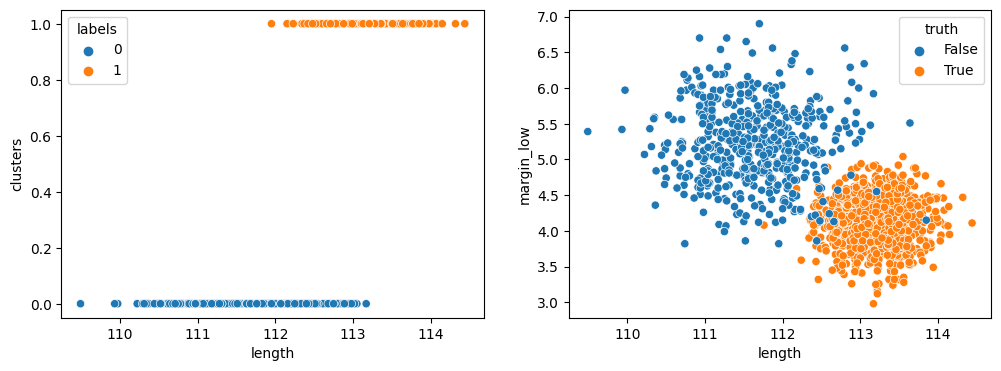

In [ ]:
## Visualising the two clusters formed
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data=df3, x='length', y='clusters', hue='labels', ax=ax[0])
sns.scatterplot(data=df3, x='length', y='margin_low', hue='truth', ax=ax[1]);

In [ ]:
acc = accuracy_score(results['truth'], results['labels'])

print(f'The accuracy score for K-Means Clustering is : {acc:.3f}')

The accuracy score for K-Means Clustering is : 0.986


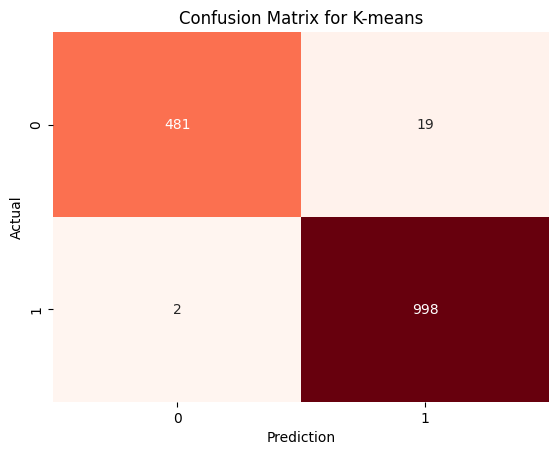

In [ ]:
##confusion matrix for K-means clustering
conf_mat = confusion_matrix(results['truth'], results['labels'])

sns.heatmap(conf_mat, annot=True, cmap='Reds', cbar=None, fmt='.0f')
plt.title('Confusion Matrix for K-means')
plt.ylabel('Actual')
plt.xlabel('Prediction');

In [ ]:
report = classification_report(results['truth'], results['labels'])
print("Classification Report for K-means:\n",report)


Classification Report for K-means:
               precision    recall  f1-score   support

       False       1.00      0.96      0.98       500
        True       0.98      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



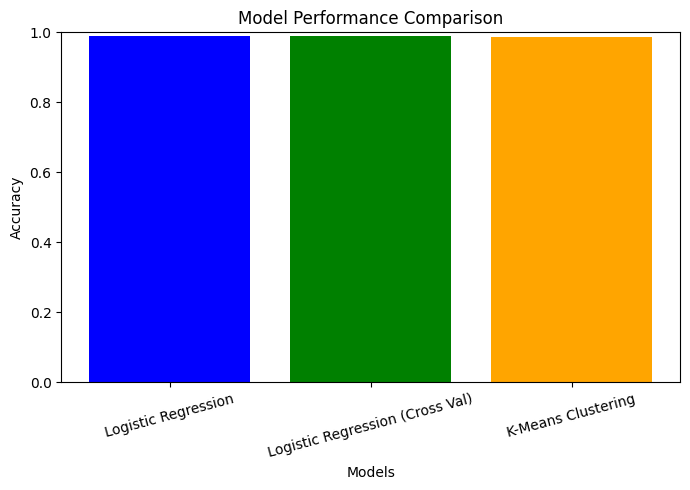

In [ ]:
# Create a bar chart
model_names = ['Logistic Regression','Logistic Regression (Cross Val)', 'K-Means Clustering']
accuracies = [accuracy,acc_crval,acc]
plt.figure(figsize=(7, 5))
plt.bar(model_names, accuracies, color=['blue', 'green','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks(rotation=15)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
print(f'The accuracy score for K-Means Clustering is : {acc*100:.1f}%')

print(f'\nAccuracy of Logistic Regression model is : {accuracy*100}%')

print(f'\nAccuracy of Logistic Regression model by cross validation is : {acc_crval*100}%')


The accuracy score for K-Means Clustering is : 98.6%

Accuracy of Logistic Regression model is : 99.0%

Accuracy of Logistic Regression model by cross validation is : 99.0%


# PCA for clear seperation

In [ ]:
## importing necessary libraries for PCA analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
## checking the data
full_dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
## Checking the information of data once again
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [ ]:
## coverting dataframe into numpy array
full_dataset_arr = full_dataset.values
print(type(full_dataset_arr))

<class 'numpy.ndarray'>


In [ ]:
# Normalizing the data
norm_full_dataset_arr = scale(full_dataset_arr)
norm_full_dataset_arr

array([[ 0.70710678, -0.48653957,  2.77412327, ...,  0.0563501 ,
        -1.128325  ,  0.17365114],
       [ 0.70710678, -1.63372936, -2.23653528, ..., -1.08055566,
        -0.69679916,  0.47166629],
       [ 0.70710678,  2.3978233 ,  1.50475644, ..., -0.12555482,
        -0.91256208,  0.55190114],
       ...,
       [-1.41421356, -0.51931643, -0.06524991, ...,  1.5570657 ,
         0.89984645, -0.83501554],
       [-1.41421356,  0.3328817 ,  0.83666863, ...,  1.04166843,
         1.33137229, -0.4911519 ],
       [-1.41421356, -1.6009525 ,  0.40241156, ...,  0.22309628,
         0.94299904, -0.69747008]])

In [ ]:
norm_full_dataset_arr.shape

(1500, 7)

In [ ]:
#Creating PCA
pca = PCA(n_components = 6) ##  Because there are 6 features
pca_values = pca.fit_transform(norm_full_dataset_arr)
pca_values

array([[ 0.9610423 ,  0.91961652,  2.84469118,  3.05952335, -0.10606376,
         0.04986165],
       [-2.05390705, -2.2689777 , -1.01902488,  0.14049159, -0.01876915,
        -0.49850216],
       [-1.21621332,  2.60562264,  0.99166143, -1.13964278,  0.85396347,
         0.21725383],
       ...,
       [ 2.36418487, -0.59681045, -0.53434736, -0.04269117,  0.23909248,
         0.50690454],
       [ 2.24941097,  0.5205314 , -0.00491385, -0.45411962, -0.36800331,
         0.47932883],
       [ 1.62883883, -1.4839931 ,  0.41550473, -0.72461471, -0.440742  ,
        -0.32097964]])

In [ ]:
## Checking variance
variance = pca.explained_variance_ratio_
variance

array([0.49217643, 0.14571505, 0.11274604, 0.10228698, 0.08505317,
       0.0463011 ])

In [ ]:
## Variance in %
variance_per = np.cumsum(np.round(variance,decimals = 8)*100)
print("The variance for each PCA is ",variance_per)

The variance for each PCA is  [49.217643 63.789148 75.063752 85.29245  93.797767 98.427877]


In [ ]:
## Joining PC1 and PC2 values to our numpy dataset
new_full_data = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']),full_dataset['is_genuine']],axis = 1)
new_full_data.head()

,PC1,PC2,is_genuine
0,0.961042,0.919617,True
1,-2.053907,-2.268978,True
2,-1.216213,2.605623,True
3,-1.556840,-1.811777,True
4,-0.232948,-0.520932,True


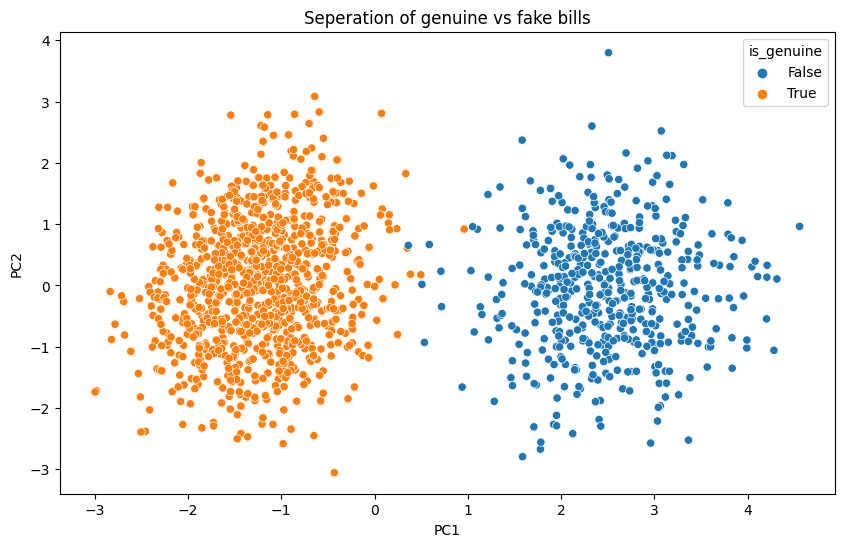

In [ ]:
## Visualisation of genuine vs fakebills seperation
plt.figure(figsize=(10,6))
fig1 = sns.scatterplot(data=new_full_data,x = new_full_data["PC1"],y = new_full_data["PC2"],hue = full_dataset["is_genuine"])
plt.title("Seperation of genuine vs fake bills")
plt.show()